# **Rising Star Pre-assignment**

## 1-Date input from user

In [12]:
#Date input from user
print("You should add 1 hour to the `to` input to make sure that you always get data for the end date as well.")

from datetime import datetime
start_date = str(input('Enter a start date in YYYY-MM-DD-H-M format'))
end_date = str(input('Enter a end date in YYYY-MM-DD-H-M format'))

You should add 1 hour to the `to` input to make sure that you always get data for the end date as well.


Enter a start date in YYYY-MM-DD-H-M format 2017-01-19-00-00
Enter a end date in YYYY-MM-DD-H-M format 2017-05-19-01-00


## 2-Data preprocessing

In [13]:
def bitcoin(start_date, end_date):

    print( "Bitcoin data obtained between {} and {} datetimes".format(start_date,end_date))

    #Converting the entered date data to datetime format
    from datetime import datetime
    date1 = datetime.strptime(start_date, "%Y-%m-%d-%H-%M")
    date2 = datetime.strptime(end_date, "%Y-%m-%d-%H-%M")

    #Converting the entered date information to timestamp
    from datetime import timezone
    timestamp1 = date1.replace(tzinfo=timezone.utc).timestamp()
    timestamp2 = date2.replace(tzinfo=timezone.utc).timestamp()
    
    #Getting the needed data from CoinGecko’s public API 
    import pandas as pd
    import requests
    endpoint = "/coins/bitcoin/market_chart/range"
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=eur&from={}&to={}".format(timestamp1,timestamp2)
    req = requests.get(url=url)
    json=req.json()
    
    #Converting json data to dataframe
    df1 = pd.DataFrame(json['prices'],columns=["time","prices"])
    df2 = pd.DataFrame(json['market_caps'],columns=["time","market_caps"])
    df3 = pd.DataFrame(json['total_volumes'],columns=["time","total_volumes"])
    df=df1.merge(df2, how='left', on='time')
    df=df.merge(df3, how='left', on='time')
    
    #Converting timestamp information of time column to datetime format
    timestamp=df["time"].tolist()  
    time=[]
    for i in timestamp: 
        import datetime
        i=int(str(i)[:10])
        dt = datetime.datetime.utcfromtimestamp(i)
        time.append(dt)
    df["time"]=time
    
    #Indexing the time column
    df.set_index('time', inplace=True)
    
    #Selecting data at 00:00 UTC from hourly data, when given a date range of 1 to 90 days
    df=df[(df.index.hour ==0 )]
    
    return df


In [14]:
df=bitcoin(start_date, end_date)
df.head()

Bitcoin data obtained between 2017-01-19-00-00 and 2017-05-19-01-00 datetimes


,prices,market_caps,total_volumes
time,,,
2017-01-19,841.435300,1.355790e+10,8.217042e+08
2017-01-20,833.041500,1.342460e+10,5.735742e+08
2017-01-21,859.697100,1.385609e+10,6.389146e+08
2017-01-22,858.382834,1.383684e+10,7.756284e+08
2017-01-23,853.612200,1.376140e+10,4.338374e+08


## 3-Data visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a6460d0>,
      dtype=object)

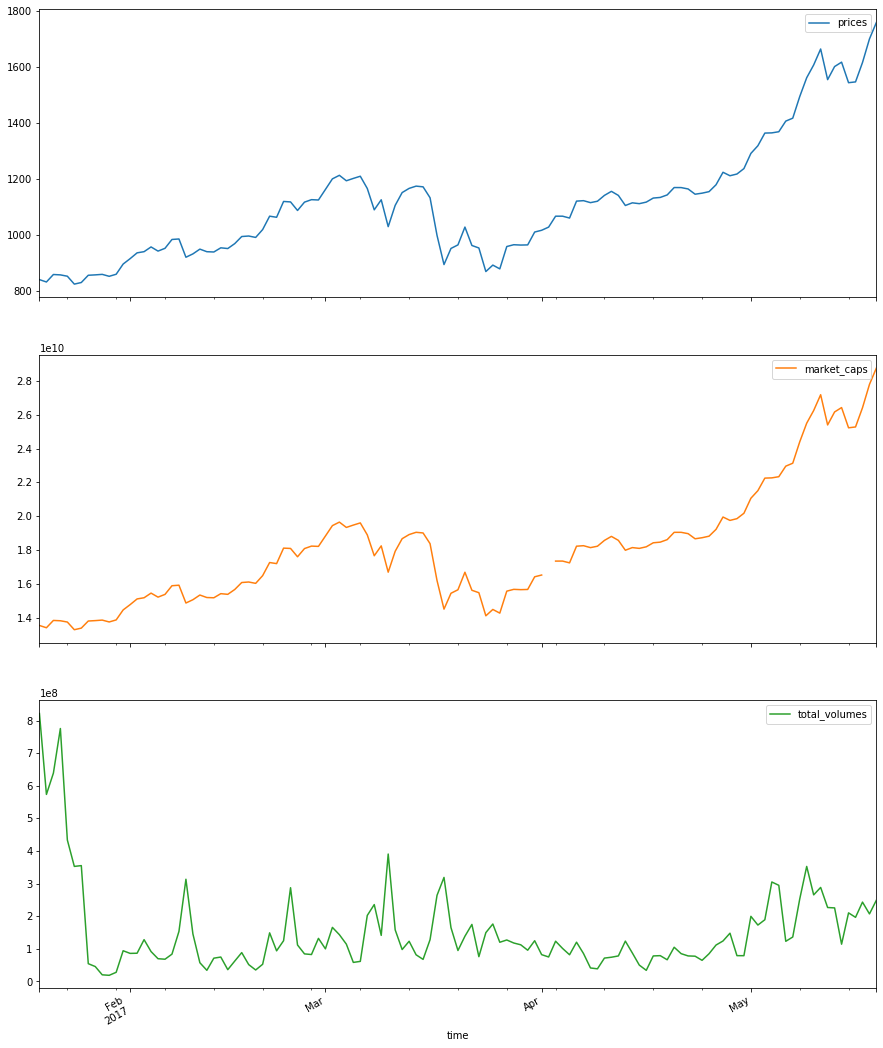

In [15]:
# Change of price, market caps and total volume data in the given time interval

df.plot(subplots=True, figsize=(15,20))

## A. How many days is the longest bearish (downward) trend within a given date range?

In [17]:
#A. How many days is the longest bearish (downward) trend within a given date range?

def downward_trend(df):
    
    prices=df["prices"].tolist()
    a=0 # a=amount of days
    trends=[]
    i=0
    while i+1<len(prices):
        if prices[i]>prices[i+1]:
            a=a+1
            i=i+1
            trends.append(a)
        else:            
            a=0
            i=i+1
    
    print("inputs from {} and to {}, and the price decreased for {} days in a row ".format(start_date,end_date,max(trends)))
             
downward_trend(df)


inputs from 2017-01-19-00-00 and to 2017-05-19-01-00, and the price decreased for 4 days in a row 


## B. Which date within a given date range had the highest trading volume?

In [18]:
# Access to the maximum value of the total volumes variable and the date of this value

print("in the date of {} the highest trading volume is {} euro".format(df["total_volumes"].idxmax(),df["total_volumes"].max()))


in the date of 2017-01-19 00:00:00 the highest trading volume is 821704196.5824802 euro


## C. Scrooge has access to Gyro Gearloose’s newest invention, a time machine. Scrooge wants to use the time machine to profit from bitcoin. The application should be able to tell for a given date range, the best day for buying bitcoin, and the best day for selling the bought bitcoin to maximize profits. If the price only decreases in the date range, your output should indicate that one should not buy (nor sell) bitcoin on any of the days. You don't have to consider any side effects of time travel or how Scrooge's massive purchases would affect the price history.

In [21]:
def buy_sell(df):
    import pandas as pd
    prices=df["prices"]
    prices=prices.tolist()
    a=[]
    for i in range(0, len(prices)-1):
        for j in range(0, len(prices)-1):
            b= prices[len(prices)-1-j]-prices[i]
            a.extend([[b,len(prices)-1-j, i]])
            a_df=pd.DataFrame(a,columns=["profit","sell", "buy"])

    a_final=a_df.iloc[a_df["profit"].idxmax()]

    final=df["prices"].reset_index()
    if a_final["profit"]<=0:
        print("no profit")
    else:
        print("buy time : {} , sell time : {}".format(final["time"][a_final["buy"]],final["time"][a_final["sell"]]))


In [22]:
buy_sell(df)

buy time : 2017-01-24 00:00:00 , sell time : 2017-05-19 00:00:00
